## ${\textbf{Libraries and loading the Data}}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('greenwich.csv')
df.columns

Index(['query', 'name', 'google_id', 'place_id', 'location_link',
       'reviews_link', 'reviews', 'rating', 'review_id',
       'review_pagination_id', 'author_link', 'author_title', 'author_id',
       'author_image', 'author_reviews_count', 'author_ratings_count',
       'review_text', 'review_img_urls', 'review_img_url', 'review_questions',
       'review_photo_ids', 'owner_answer', 'owner_answer_timestamp',
       'owner_answer_timestamp_datetime_utc', 'review_link', 'review_rating',
       'review_timestamp', 'review_datetime_utc', 'review_likes', 'reviews_id',
       'reviews_per_score_1', 'reviews_per_score_2', 'reviews_per_score_3',
       'reviews_per_score_4', 'reviews_per_score_5',
       'review_questions_Parking space', 'review_questions_Parking options',
       'review_questions_Parking'],
      dtype='object')

## ${\textbf{EDA and Preperation}}$

In [3]:
# Creating a subset with necessary columns and renaming them
subset = df[['review_datetime_utc', 'review_rating', 'review_text']]
subset.columns = ['date', 'rating', 'review']
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10152 entries, 0 to 10151
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    10152 non-null  object
 1   rating  10152 non-null  int64 
 2   review  4706 non-null   object
dtypes: int64(1), object(2)
memory usage: 238.1+ KB


In [4]:
# Converting the data column to an actual pandas datetime 
subset.loc[:, 'date'] = pd.to_datetime(subset['date'])
subset

,date,rating,review
0,2024-04-17 08:08:59,4,NaN
1,2024-04-16 21:47:40,4,NaN
2,2024-04-16 18:36:30,5,"This is an Ikea with a view, and a terrace!"
3,2024-04-16 15:18:19,5,Best
4,2024-04-16 14:36:25,5,NaN
...,...,...,...
10147,2018-12-14 17:02:48,5,NaN
10148,2018-12-11 15:12:26,5,NaN
10149,2018-12-01 17:29:03,5,"Can't wait, this store is gonna be awesome!"
10150,2018-11-19 14:43:59,5,I am waiting ! My favourite store !


In [5]:
# Get the first three rows
first_three = subset.head(3)

# Get the last three rows
last_three = subset.tail(3)

# Concatenate the first three and last three rows into a new DataFrame
first_and_last3 = pd.concat([first_three, last_three], axis=0)

In [7]:
# Checking for duplicates
duplicates = subset.duplicated()

# Counting the number of duplicated rows
number_of_duplicates = duplicates.sum()
print(f"Number of duplicated rows: {number_of_duplicates}")

Number of duplicated rows: 0


In [8]:
greenwich = subset

## ${\textbf{1. Quantitative Analysis}}$

## ${\textbf{1.1 Reviews with text vs without}}$

In [ ]:
# Add a 'has_review' column to indicate if there is a review text
greenwich['has_review'] = ~greenwich['review'].isnull()

# Prepare the data for plotting
review_counts = greenwich.groupby('has_review').size().reset_index(name='counts')
rating_distribution = greenwich.groupby(['rating', 'has_review']).size().reset_index(name='counts')

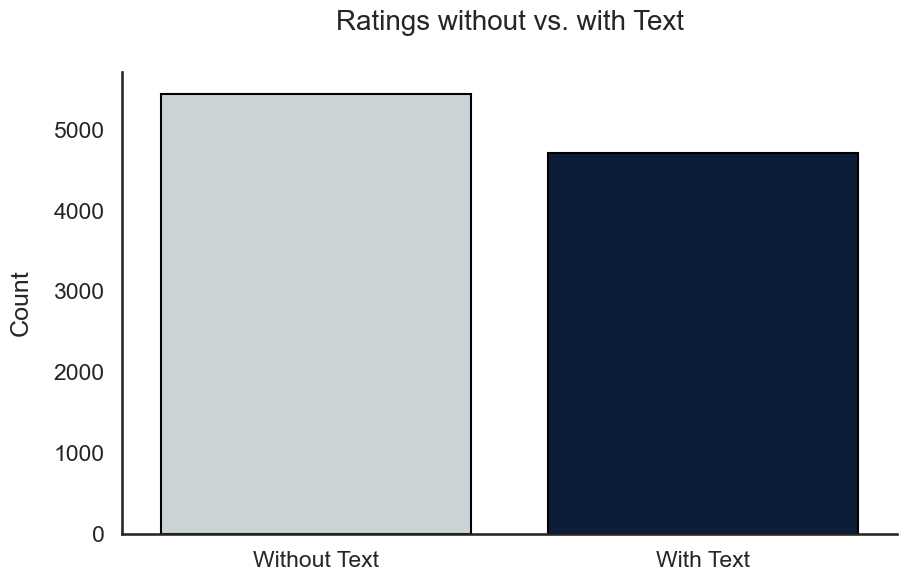

   has_review  counts
0       False    5446
1        True    4706


In [30]:
sns.set_style("white")

# Set the context to "talk" for larger labels, you can also use "poster" for even larger sizes
sns.set_context("talk")

# Plot for total count of ratings with reviews vs without reviews
plt.figure(figsize=(10, 6))
sns.barplot(data=review_counts, x='has_review', y='counts', hue='has_review', palette=['#cad4d8', '#061a40'], edgecolor='black', legend=False)
plt.title("Ratings without vs. with Text", pad=30, fontsize=20)
plt.xticks([0, 1], ["Without Text", "With Text"])
plt.xlabel("")
plt.ylabel("Count", labelpad=15)

plt.ylim()

# Access the current axis of the plot
ax = plt.gca()

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
print(review_counts)

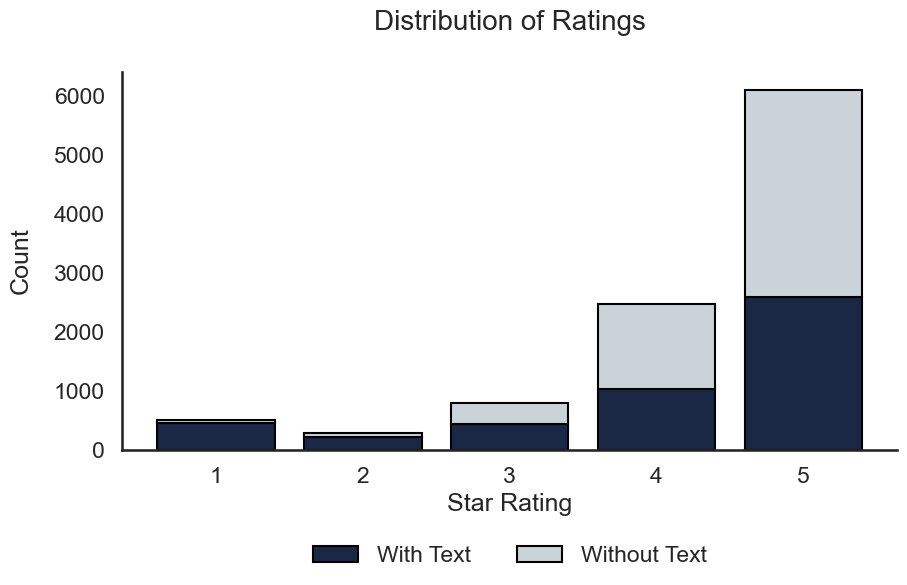

In [10]:
# Set the aesthetic style of the plots
sns.set_style("white")
sns.set_context("talk")  # For larger labels

# Plot for distribution of reviews with and without text for every rating
plt.figure(figsize=(10, 6))
sns.histplot(
    data=greenwich, 
    x='rating', 
    hue='has_review',
    hue_order=[False, True],  # Order: first "False" (no text), then "True" (with text)
    multiple='stack', 
    palette=['#cad4d8', '#1b2845'],  # Match the colors to the hue_order#cad4d8', '#1b2845'
    discrete=True, 
    shrink=0.8,
    edgecolor='black',
    alpha=1
)

plt.title("Distribution of Ratings", pad=30, fontsize=20)
plt.xlabel("Star Rating")
plt.ylabel("Count", labelpad=15)
plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin to create space for the legend
plt.legend(labels=['With Text', 'Without Text'], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=False)

plt.ylim()

# Access the current axis of the plot
ax = plt.gca()

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## ${\textbf{1.2 Count Reviews}}$

In [ ]:
# Extract month and year from the 'date' column for monthly aggregation
greenwich['month_year'] = pd.to_datetime(greenwich['date']).dt.to_period('M')

# Group by month_year to get the count of reviews for each month
monthly_reviews = greenwich.groupby('month_year').size()

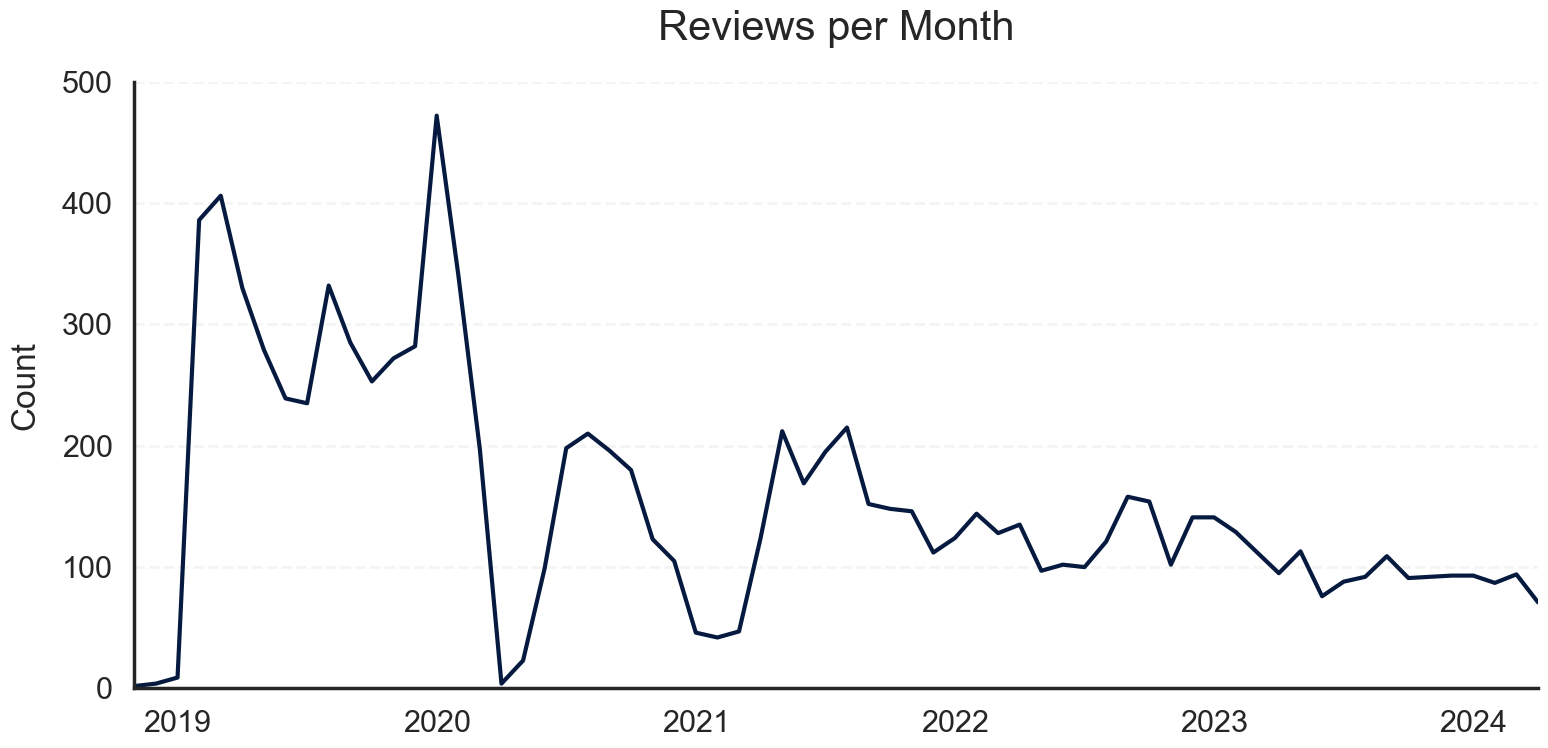

In [21]:
# Set the context to "talk" for larger labels, you can also use "poster" for even larger sizes
sns.set_context("poster")

# Plotting the line chart for monthly reviews trend
plt.figure(figsize=(16, 8))
monthly_reviews.plot(color='#061a40', marker='', linestyle='-')
plt.title('Reviews per Month', pad=30, fontsize=30)
plt.xlabel('')
plt.ylabel('Count', labelpad=15)
plt.grid(axis='y', linestyle='--', alpha=0.2)  # Slightly increased alpha for better visibility
plt.ylim(0, 500)  # Sets the y-axis range from 0 to 500
plt.autoscale(enable=True, axis='x', tight=True)  # Adjusts the layout
plt.tight_layout()  # Ensures there is no content clipping around the edges



# Access the current axis of the plot
ax = plt.gca()

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [ ]:
# Extrahiere das Jahr aus der 'date' Spalte
greenwich['year'] = pd.to_datetime(greenwich['date']).dt.year

# Filtere den DataFrame für die Jahre 2020 bis 2024
filtered_greenwich = greenwich[greenwich['year'].between(2019, 2024)]

# Gruppieren nach Jahr und Zählen der Anzahl der Bewertungen
reviews_per_year = filtered_greenwich.groupby('year').size()


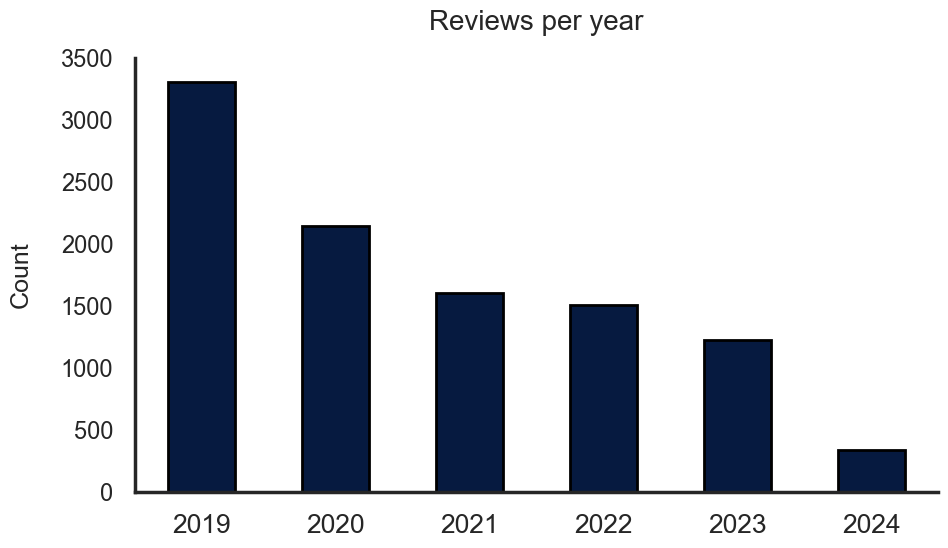

In [19]:
# Plotte das Balkendiagramm für die Gesamtzahl der Bewertungen pro Jahr
plt.figure(figsize=(10, 6))
reviews_per_year.plot(kind='bar', color='#061a40', edgecolor='black')
plt.title("Reviews per year", fontsize=20, pad=20)
plt.ylabel("Count", fontsize=18, labelpad=20)
plt.xlabel("")
plt.xticks(rotation=0, fontsize=19)
plt.yticks(fontsize=17)
plt.grid(False)
plt.ylim(0, 3500)
plt.tight_layout()

# Verberge die oberen und rechten Spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## ${\textbf{1.3 Assessment of customer satisfaction}}$

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.dates as mdates

# Angenommen, 'otto' ist dein DataFrame und er enthält eine 'date' Spalte mit Datumseinträgen
greenwich['date'] = pd.to_datetime(greenwich['date'])

# Filtere Einträge vor dem Jahr 2021 heraus
greenwich_filtered = greenwich[greenwich['date'].dt.year >= 2019]

# Gruppiere nach Monat und Bewertung, um die Anzahl der Reviews für jeden Monat und jede Bewertung zu erhalten
monthly_reviews = greenwich_filtered.groupby([greenwich_filtered['date'].dt.to_period('M'), 'rating']).size().unstack(fill_value=0)

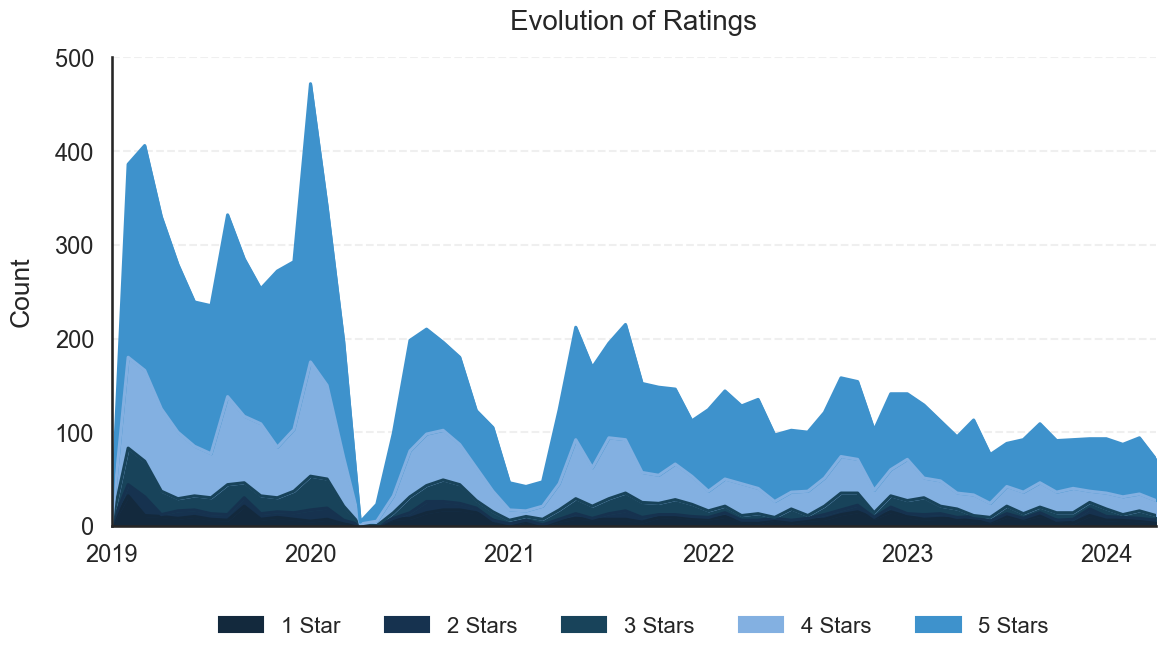

In [26]:
# Definiere die Farben für die Bewertungen
palette = {
    1: '#13293d',
    2: '#16324f',
    3: '#18435a',
    4: '#83b0e1',
    5: '#3e92cc'
}

# Plotte das gestapelte Flächendiagramm
fig, ax = plt.subplots(figsize=(12, 7))
monthly_reviews.plot(kind='area', stacked=True, color=[palette[rating] for rating in sorted(palette)], alpha=1.0, ax=ax)

# Anpassen des Plots
plt.title("Evolution of Ratings", fontsize=20, pad=20)
plt.ylabel("Count", labelpad=15, fontsize=19)
plt.xlabel("")

# Setze die x-Achse, um nur die Jahre als Tick-Labels anzuzeigen
ax.xaxis.set_major_locator(mdates.YearLocator())  # Setze Haupt-Tick-Intervall auf Jahre
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formatierung der Haupt-Ticks als Jahre
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Setze Neben-Tick-Intervall auf Monate

# Setze die x-Achse, um die spezifizierten Jahre als Tick-Labels anzuzeigen
years = [2019, 2020, 2021, 2022, 2023, 2024]
ax.set_xticks([pd.Timestamp(year=year, month=1, day=1) for year in years])
ax.set_xticklabels(years)

# Verberge Spines und passe Tick-Labels an
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=17, rotation=0)  # Drehung der Tick-Labels für bessere Lesbarkeit
ax.tick_params(axis='y', labelsize=17)

# Passe die Legende an
legend_patches = [mpatches.Patch(color=palette[rating], label=f"{rating} Star" if rating == 1 else f"{rating} Stars") for rating in sorted(palette)]
ax.legend(handles=legend_patches, title='', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=16, frameon=False)

# Setze die Schriftgröße der Tick-Labels auf der x- und y-Achse
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)

# Gitter und Layout
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, 500)  # Sets the y-axis range from 0 to 500
plt.tight_layout()

plt.show()

In [14]:
# Initialize a dictionary to store the percentage change for each rating
percentage_changes = {}

# Loop through each rating to calculate the percentage change
for rating in sorted(greenwich['rating'].unique()):
    # Filter for the specific rating
    specific_rating_reviews = greenwich[greenwich['rating'] == rating]
    
    # Get counts for 2022 and 2023
    count_2022 = specific_rating_reviews['date'].dt.year.value_counts().get(2022, 0)
    count_2023 = specific_rating_reviews['date'].dt.year.value_counts().get(2023, 0)
    
    # Calculate the percentage change
    percentage_change = ((count_2023 - count_2022) / count_2022) * 100 if count_2022 > 0 else None
    percentage_changes[rating] = percentage_change

    # Print the results
    print(f"Rating {rating}: Change from 2022 to 2023 is {percentage_change}%")
    print(f"Rating {rating}: Total Count for 2022: {count_2022}")
    print(f"Rating {rating}: Total Count for 2023: {count_2023}")

Rating 1: Change from 2022 to 2023 is -8.16326530612245%
Rating 1: Total Count for 2022: 98
Rating 1: Total Count for 2023: 90
Rating 2: Change from 2022 to 2023 is -2.564102564102564%
Rating 2: Total Count for 2022: 39
Rating 2: Total Count for 2023: 38
Rating 3: Change from 2022 to 2023 is -4.040404040404041%
Rating 3: Total Count for 2022: 99
Rating 3: Total Count for 2023: 95
Rating 4: Change from 2022 to 2023 is -16.109422492401215%
Rating 4: Total Count for 2022: 329
Rating 4: Total Count for 2023: 276
Rating 5: Change from 2022 to 2023 is -22.210414452709884%
Rating 5: Total Count for 2022: 941
Rating 5: Total Count for 2023: 732


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

# Assuming 'review_df' is your DataFrame and it contains a 'date' column with datetime type entries

# Create a 'month_year' column if it doesn't already exist
greenwich['month_year'] = greenwich['date'].dt.to_period('M')

# Extract the year from 'month_year' for filtering
greenwich['year'] = greenwich['month_year'].dt.year

# Filter the DataFrame for the years 2021, 2022, and 2023
average_monthly_rating = greenwich[greenwich['year'].isin([2019, 2020, 2021, 2022, 2023, 2024])]

# Group by 'month_year' to get the average rating per month
average_monthly_rating = average_monthly_rating.groupby('month_year')['rating'].mean()

# Sort the index to ensure the plot follows the chronological order
average_monthly_rating.sort_index(inplace=True)

# Convert the 'month_year' index to DateTimeIndex for plotting
average_monthly_rating.index = average_monthly_rating.index.to_timestamp()

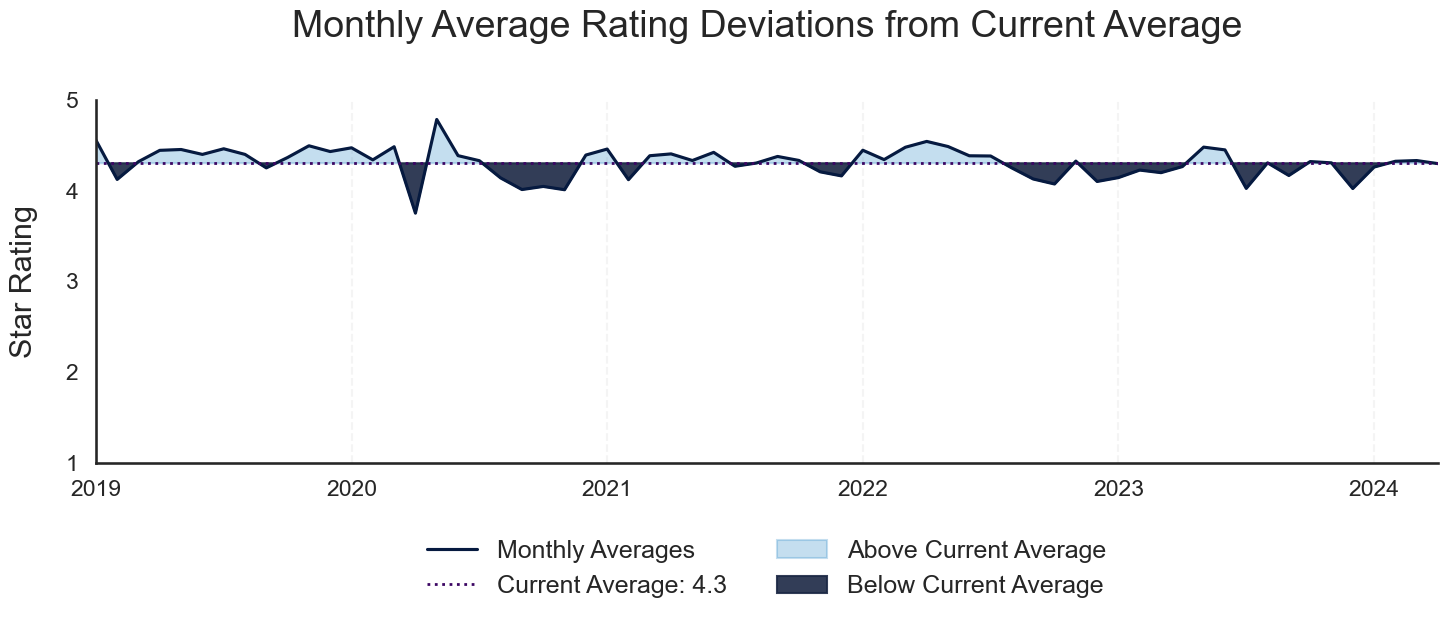

In [28]:
# Plotting the line chart for monthly average rating trend
plt.figure(figsize=(15, 7))
average_monthly_rating.plot(color='#061a40')

# Set the y-axis scale from 1 to 5 and specify y-ticks to be whole numbers only
plt.ylim(1, 5)
plt.yticks([1, 2, 3, 4, 5])

# Add a horizontal line for the current average rating
current_average = 4.3
plt.axhline(y=current_average, color='#3c0663', linestyle=':', linewidth=2, label='Aktueller Durchschnitt 3.8')
# Display the legend
plt.legend()

# Get the x and y data from the plot
x_data = average_monthly_rating.index
y_data = average_monthly_rating.values

# Ensure we fill between all points where the line crosses the average
plt.fill_between(x_data, y_data, current_average, where=(y_data >= current_average), interpolate=True, color='#3e92cc', alpha=0.3, label='Über dem aktuellen Durchschnitt')
plt.fill_between(x_data, y_data, current_average, where=(y_data <= current_average), interpolate=True, color='#1b2845', alpha=0.9, label='Unter dem aktuellen Durchschnitt')


# Set the context to "talk" for larger labels, you can also use "poster" for even larger sizes
sns.set_context("poster")

# Access the current axis of the plot
ax = plt.gca()

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.title("Monthly Average Rating Deviations from Current Average", y=1.02, fontsize=27, pad=40)
plt.xlabel("")
plt.ylabel("Star Rating", labelpad=20, fontsize=22)
plt.grid(axis='x', linestyle='--', alpha=0.2)

# Set the x-axis to only show the years as tick labels
years = average_monthly_rating.index.year.unique()
ax.set_xticks([pd.Timestamp(year=year, month=1, day=1) for year in years])
ax.set_xticklabels(years)

# Ensure no other tick labels are shown
ax.xaxis.set_minor_locator(plt.NullLocator())

handles, labels = ax.get_legend_handles_labels()
labels = ['Monthly Averages', 'Current Average: 4.3', 'Above Current Average', 'Below Current Average']  # Replace with your actual labels
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=18, frameon=False)


# Manually set x-ticks to the first of January of each year in the dataset
years = monthly_reviews.index.year.unique()
ax.set_xticks([pd.Timestamp(year=y, month=1, day=1) for y in years])
ax.set_xticklabels(years)

plt.tight_layout()
plt.show()

In [29]:
# Extract the year from the 'date' column
greenwich.loc[:, 'year'] = greenwich['date'].dt.year

# Filter the DataFrame for the specified years
filtered_years = greenwich[greenwich['year'].isin([2019, 2020, 2021, 2022, 2023, 2024])]

# Group by 'year' to get the average rating for each year
average_yearly_rating = filtered_years.groupby('year')['rating'].mean()

# Printing the results
print(average_yearly_rating)

year
2019    4.364571
2020    4.294693
2021    4.314677
2022    4.312085
2023    4.236393
2024    4.301449
Name: rating, dtype: float64


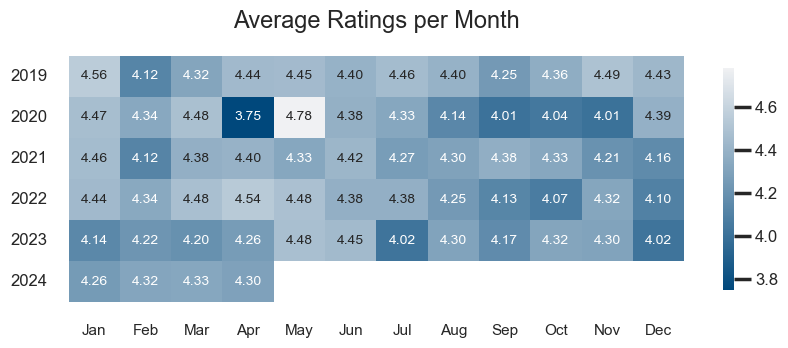

In [17]:
# Filter the DataFrame for the years 2021 to 2023
filtered_df = greenwich[greenwich['date'].dt.year.isin([2019, 2020, 2021, 2022, 2023, 2024])]

# Calculate the monthly average ratings for each month within 2021 to 2023
monthly_averages = filtered_df.groupby([filtered_df['date'].dt.year, filtered_df['date'].dt.month])['rating'].mean()

# Unstack the month index for the heatmap
monthly_averages_unstacked = monthly_averages.unstack(level=1)

# Create a custom monochromatic palette
monochrome_palette = sns.light_palette("#00487c", reverse=True, as_cmap=True)

plt.figure(figsize=(9, 4))
# Create the heatmap without specifying a label in cbar_kws
heatmap = sns.heatmap(monthly_averages_unstacked, annot=True, fmt=".2f", cmap=monochrome_palette,
                      annot_kws={"fontsize":10},
                      cbar_kws={'shrink': 0.9})

# Adjust font size for color bar labels
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)  # 
plt.title("Average Ratings per Month", fontsize=17, pad=20)

# Define the month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set the x-axis tick labels to month names
plt.xticks(ticks=np.arange(0.5, len(month_labels)+0.5), labels=month_labels, rotation=0, fontsize=11)

# Set the y-axis ticks to be horizontal and use year labels
year_labels = monthly_averages_unstacked.index
plt.yticks(ticks=np.arange(0.5, len(year_labels)+0.5), labels=year_labels, rotation=0, fontsize=12)

# Set the y-axis ticks to be horizontal
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()


plt.show()